<h1>Introduction to Pandas</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1920px-Pandas_logo.svg.png"/>

Pandas is a library for manipulation and analysis of tabular data.

Please have a look at the [official documentation](https://pandas.pydata.org/docs/) and numerous [tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html).

**We hightly recommend to dive into the notebooks in the [getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) section.**

---

# Where to get data from?

There are literally tons of sources. These are a few examples:

* [kaggle](https://www.kaggle.com/)
* [ncsu](https://www.lib.ncsu.edu/teaching-and-learning-datasets)
* [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets.php)
* [Datos abiertos del gobierno colombiano](https://www.datos.gov.co/)

# Wine quality dataset

In this first exercise, we will use the *Wine Quality Dataset* obtained from the UCI repository, or directly from the original  [source](http://www3.dsi.uminho.pt/pcortez/wine/).

> The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link](http://www.vinhoverde.pt/en/) or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

> These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


This dataset is intended for classification tasks, but we will use it here just for the purpose of  illustrating different data manipulation and analysis tasks with Pandas.


## A note on data formats

Pandas can read data in [a lot](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) of formats, among others: Excel, CSV, but also SQL.

In the following example, the datasets are availables as a zipped folder containing two CSV files.



In [1]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

URL_DATASET = 'http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip'
DATASET_DIR = '../../data/winequality'

def download_and_unzip(url, extract_to='.'):
    """Downloads and extracts the dataset
    """
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)



In [2]:
download_and_unzip(URL_DATASET, DATASET_DIR)

## Importing Pandas

In [3]:
import pandas as pd # the convention is to import it as pd
import os

In [4]:
file_name = os.path.join('/home/alexander/IniciativaMálaga/SemilleroUIS/data/winequality/winequality', 'winequality-red.csv')
red_wine = pd.read_csv(file_name)

In [5]:
red_wine

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
...,...
1594,6.2;0.6;0.08;2;0.09;32;44;0.9949;3.45;0.58;10.5;5
1595,5.9;0.55;0.1;2.2;0.062;39;51;0.99512;3.52;0.76...
1596,6.3;0.51;0.13;2.3;0.076;29;40;0.99574;3.42;0.7...
1597,5.9;0.645;0.12;2;0.075;32;44;0.99547;3.57;0.71...


**WARNING:** there is something odd with the parsing of this table. By default, `read_csv` assumes that the separator is comma `','`; however, in this case, the files use a semicolon `';'`. We have to explicitly tell Pandas to use semicolon.

In [6]:
red_wine = pd.read_csv(file_name, sep=';')
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


It looks better now. We have a table with 1599 rows and 12 columns. The size of the dataset can also be found with the property `shape`, which returns a tuple.

In [7]:
red_wine.shape

(1599, 12)

## Basic inspection of the data

The following cells illustrate some Pandas methods that can be used to inspect the table at different levels.

In [8]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Sometimes, when the tables are too long (too many columns), it is helpful to print the tranpose of the table instead `.T`.

In [9]:
red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
red_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [13]:
red_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [14]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The `info()` method gives us information about the data types and missing values. If there are missing values (`null` or `NaN`), we need to come up with a strategy to either get rid of or replace them.

## Selecting a subset of the table

Selection can be done by using the notation `dataframe.column` or `dataframe['column']`. Please notice that the former only works if the column names don't include spaces.

In [15]:
# accessing the column 'density'
red_wine.density

0       0.99780
1       0.99680
2       0.99700
3       0.99800
4       0.99780
         ...   
1594    0.99490
1595    0.99512
1596    0.99574
1597    0.99547
1598    0.99549
Name: density, Length: 1599, dtype: float64

In [16]:
red_wine['density']

0       0.99780
1       0.99680
2       0.99700
3       0.99800
4       0.99780
         ...   
1594    0.99490
1595    0.99512
1596    0.99574
1597    0.99547
1598    0.99549
Name: density, Length: 1599, dtype: float64

One can also select a subset of columns specifying the column names as a list:

In [17]:
red_wine[['fixed acidity', 'citric acid', 'pH']]

,fixed acidity,citric acid,pH
0,7.4,0.00,3.51
1,7.8,0.00,3.20
2,7.8,0.04,3.26
3,11.2,0.56,3.16
4,7.4,0.00,3.51
...,...,...,...
1594,6.2,0.08,3.45
1595,5.9,0.10,3.52
1596,6.3,0.13,3.42
1597,5.9,0.12,3.57


Let's assume for the subsequent analysis we are only interested in a subset of the columns.

In [18]:
features = ['pH', 'alcohol', 'density', 'chlorides', 'residual sugar', 'sulphates']
subset = red_wine[features]
subset

,pH,alcohol,density,chlorides,residual sugar,sulphates
0,3.51,9.4,0.99780,0.076,1.9,0.56
1,3.20,9.8,0.99680,0.098,2.6,0.68
2,3.26,9.8,0.99700,0.092,2.3,0.65
3,3.16,9.8,0.99800,0.075,1.9,0.58
4,3.51,9.4,0.99780,0.076,1.9,0.56
...,...,...,...,...,...,...
1594,3.45,10.5,0.99490,0.090,2.0,0.58
1595,3.52,11.2,0.99512,0.062,2.2,0.76
1596,3.42,11.0,0.99574,0.076,2.3,0.75
1597,3.57,10.2,0.99547,0.075,2.0,0.71


Let's also assume that we wanna rename the `residual sugar` column for convenience (no blanks).

In [19]:
data = subset.rename(columns = {'residual sugar': 'sugar'})


## An image is worth  a 1000 words

It is always a good idea to explore the dataset visually.

In [20]:
# a simple lineplot of the pH value
data.pH.plot(figsize=(10,8))  # equivalent to data['pH'].plot()

<AxesSubplot:>

In [21]:
import seaborn as sns

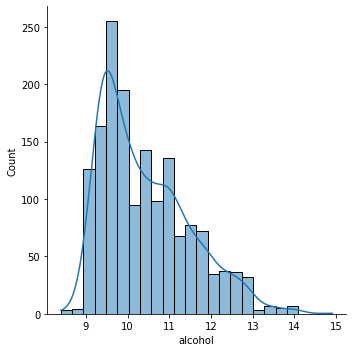

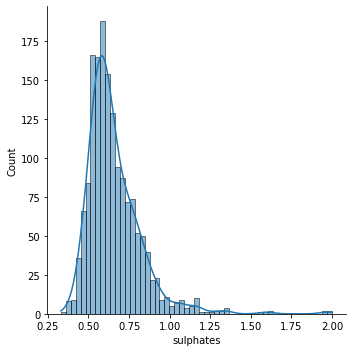

In [22]:
# and some histograms
sns.displot(data['alcohol'], kde=True)
sns.displot(data['sulphates'], kde=True);

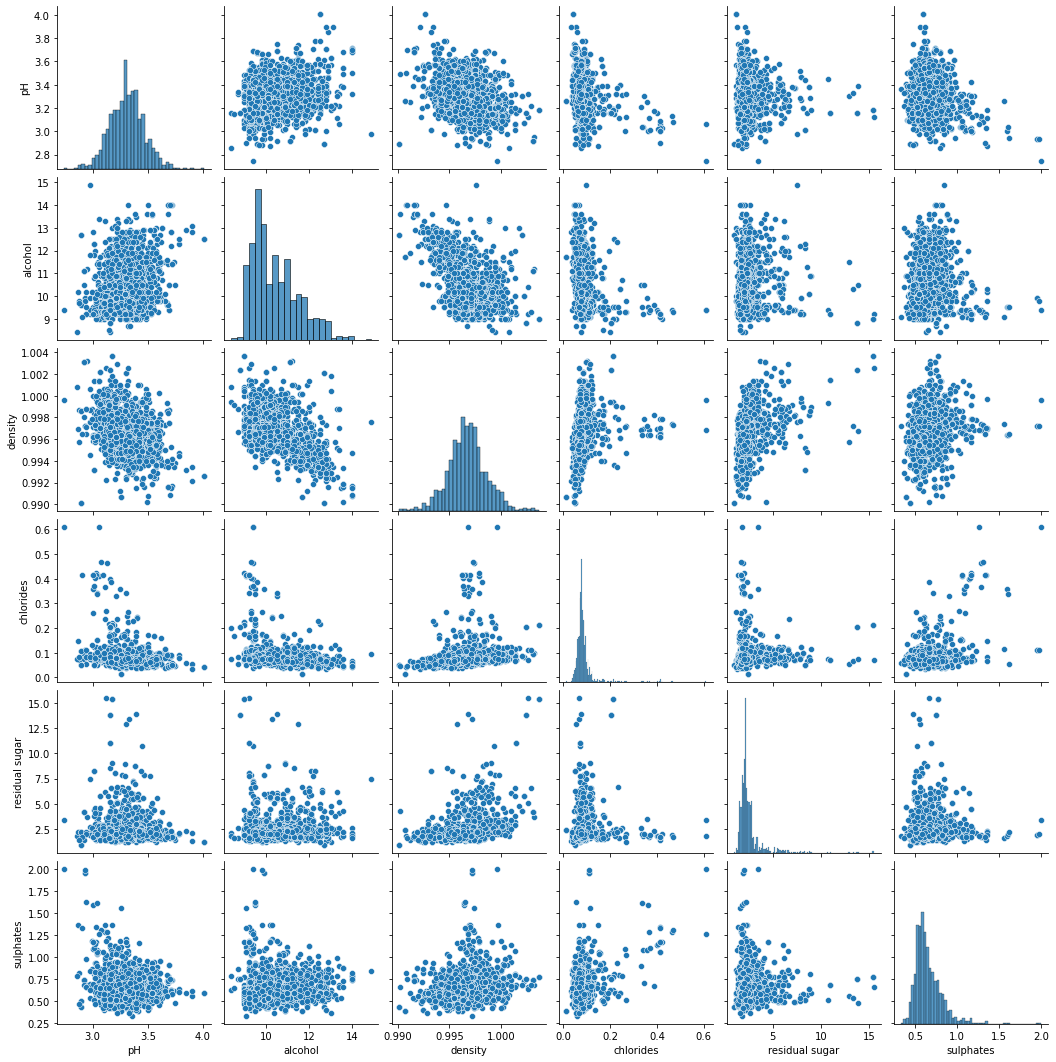

In [23]:
sns.pairplot(subset)

## Basic data manipulation

Pandas uses Numpy underneath. This means that Pandas supports vectorization.

Let's assume that we wanna divide the alcohol content by 1.5. No for loops required. It is as simple as:

In [24]:
data.alcohol / 1.5

0       6.266667
1       6.533333
2       6.533333
3       6.533333
4       6.266667
          ...   
1594    7.000000
1595    7.466667
1596    7.333333
1597    6.800000
1598    7.333333
Name: alcohol, Length: 1599, dtype: float64

If we wanna make the change permanent, we have to either assign it to the same column or to a new one.

In [25]:
data['alcohol_new'] = data['alcohol'] / 1.5

In [26]:
data.head()

,pH,alcohol,density,chlorides,sugar,sulphates,alcohol_new
0,3.51,9.4,0.9978,0.076,1.9,0.56,6.266667
1,3.20,9.8,0.9968,0.098,2.6,0.68,6.533333
2,3.26,9.8,0.9970,0.092,2.3,0.65,6.533333
3,3.16,9.8,0.9980,0.075,1.9,0.58,6.533333
4,3.51,9.4,0.9978,0.076,1.9,0.56,6.266667


Let's now assume that we wanna find the square root of the alcohol level.

In [27]:
import numpy as np

In [28]:
data['alcohol_sqrt'] = np.sqrt(data['alcohol'])

In [29]:
data.head()

,pH,alcohol,density,chlorides,sugar,sulphates,alcohol_new,alcohol_sqrt
0,3.51,9.4,0.9978,0.076,1.9,0.56,6.266667,3.065942
1,3.20,9.8,0.9968,0.098,2.6,0.68,6.533333,3.130495
2,3.26,9.8,0.9970,0.092,2.3,0.65,6.533333,3.130495
3,3.16,9.8,0.9980,0.075,1.9,0.58,6.533333,3.130495
4,3.51,9.4,0.9978,0.076,1.9,0.56,6.266667,3.065942


In some cases, we want to apply an arbitrary function to a column (that might or not support vectorization).

In [30]:
def my_function(x):
    return x**3 - 1.4*x**2 - x + 3

In [31]:
data['alcohol'].apply(my_function)

0        700.480
1        799.936
2        799.936
3        799.936
4        700.480
          ...   
1594     995.775
1595    1221.112
1596    1153.600
1597     908.352
1598    1153.600
Name: alcohol, Length: 1599, dtype: float64

## Filtering

One of the most powerful features of Pandas is the ability to apply filters.

Let's imagine we wanna get all the values where the alcohol level is less than 8.9.

In [32]:
data[data['alcohol'] < 8.9]

,pH,alcohol,density,chlorides,sugar,sulphates,alcohol_new,alcohol_sqrt
371,3.32,8.7,0.99670,0.056,1.6,0.87,5.800000,2.949576
517,3.16,8.4,0.99940,0.200,2.1,0.63,5.600000,2.898275
528,3.34,8.7,0.99880,0.084,2.6,0.75,5.800000,2.949576
544,2.86,8.4,1.00080,0.075,1.8,0.79,5.600000,2.898275
1436,3.15,8.5,0.99914,0.169,1.6,0.65,5.666667,2.915476
1474,3.16,8.8,1.00242,0.205,13.8,0.75,5.866667,2.966479
1476,3.16,8.8,1.00242,0.205,13.8,0.75,5.866667,2.966479


In general, filters can include multiple conditions. For instance, let's assume we wanna extract all rows where the `chlorides` are between 0.2 and 0.5, inclusive.

In [33]:
# notice the use of the AND operator &
chlorides_filter = (data.chlorides >= 0.2) & (data.chlorides <= 0.5)

In [34]:
# filters evaluate to True or False
chlorides_filter

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: chlorides, Length: 1599, dtype: bool

In [35]:
data[chlorides_filter].head()

,pH,alcohol,density,chlorides,sugar,sulphates,alcohol_new,alcohol_sqrt
17,3.11,9.3,0.9968,0.368,1.7,1.28,6.200000,3.049590
19,3.04,9.2,0.9969,0.341,1.8,1.08,6.133333,3.033150
42,3.21,10.5,0.9968,0.332,2.6,0.90,7.000000,3.240370
81,3.13,9.4,0.9974,0.464,1.9,1.28,6.266667,3.065942
83,3.16,9.4,0.9969,0.401,1.8,1.14,6.266667,3.065942


we can try to see it graphically:

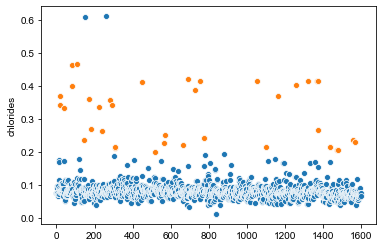

In [36]:
sns.lineplot(data=data['chlorides'], marker='o', linestyle='', err_style='bars')
sns.lineplot(data=data['chlorides'][chlorides_filter], marker='o', linestyle='', err_style='bars')
sns.set(rc={"figure.figsize":(15, 12)})


Finally, several filters can be combined with logical operators: AND (&), OR (|), etc.

In [37]:
 sulphates_filter = data.sulphates < 0.8

In [38]:
data[chlorides_filter & sulphates_filter]


,pH,alcohol,density,chlorides,sugar,sulphates,alcohol_new,alcohol_sqrt
291,3.30,10.5,0.99790,0.343,2.0,0.71,7.000000,3.240370
307,3.19,9.5,0.99940,0.213,2.4,0.62,6.333333,3.082207
308,3.19,9.5,0.99940,0.214,2.4,0.63,6.333333,3.082207
517,3.16,8.4,0.99940,0.200,2.1,0.63,5.600000,2.898275
566,3.32,9.0,0.99910,0.226,2.5,0.60,6.000000,3.000000
567,3.32,9.0,0.99910,0.226,2.5,0.60,6.000000,3.000000
568,3.31,10.7,0.99900,0.250,2.6,0.79,7.133333,3.271085
666,3.18,9.5,0.99800,0.222,1.8,0.60,6.333333,3.082207
730,3.17,9.6,0.99820,0.387,2.3,0.67,6.400000,3.098387
776,3.40,10.3,0.99612,0.243,2.4,0.60,6.866667,3.209361


---

# Weather observations from Málaga, Santander, Colombia

<img src="https://github.com/twaclaw/malaga/raw/master/images/ws.jpg" width=500/>

This course is mainly devoted to the analysis of the data measurements captured by this weather station:

* [instantaneous measurements](https://twaclaw.github.io/malaga/)
* [database](https://github.com/twaclaw/malaga_db)

In this case, the data are time series stored in a `sqlite3` database.

Jupyter Notebooks allow also to execute shell commands (Operating System commands). This commands must be prepended with ! (the exclamation sign). The following command downloads the database to the `../../data` folder if it doesn't exist yet.


In [39]:
#! [[ ! -f ../../data/weewx.sdb ]] && curl -L  https://github.com/twaclaw/malaga_db/raw/master/weewx.sdb -o ../../data/weewx.sdb
import requests

def DBdownloader(url,fileDir):
    if os.path.isfile(fileDir) == False:
        r = requests.get(url)
        open(fileDir,'wb').write(r.content)

        
DBdownloader('https://github.com/twaclaw/malaga_db/raw/master/weewx.sdb','/home/alexander/IniciativaMálaga/SemilleroUIS/data/weewx.sdb')  

In [40]:
import sqlite3

DATABASE = '/home/alexander/IniciativaMálaga/SemilleroUIS/data/weewx.sdb'

# Create a connection.
cnx = sqlite3.connect(DATABASE)

df = pd.read_sql_query("SELECT * FROM archive", cnx)

df['date'] = pd.to_datetime(df['dateTime'], unit='s')

df.date = df.date.dt.tz_localize('UTC').dt.tz_convert('America/Bogota').dt.tz_localize(None)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
dateTime,268907.0,1.592714e+09,2.362139e+07,1.546026e+09,1.572481e+09,1.592720e+09,1.612894e+09,1.633886e+09
usUnits,268907.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
interval,268907.0,5.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
barometer,268907.0,2.972486e+01,7.055072e-02,2.946300e+01,2.968000e+01,2.973000e+01,2.977500e+01,2.994100e+01
pressure,266049.0,2.312249e+01,5.351733e-02,2.288325e+01,2.308670e+01,2.312694e+01,2.316141e+01,2.329098e+01
altimeter,266049.0,3.019264e+01,6.644380e-02,2.989556e+01,3.014821e+01,3.019817e+01,3.024096e+01,3.040180e+01
inTemp,268907.0,7.070355e+01,4.646954e+00,5.970000e+01,6.750000e+01,6.970000e+01,7.290000e+01,8.970000e+01
outTemp,268891.0,6.420753e+01,7.426493e+00,4.720000e+01,5.830000e+01,6.220000e+01,6.990000e+01,8.700000e+01
inHumidity,268907.0,6.260648e+01,9.972453e+00,1.500000e+01,5.700000e+01,6.400000e+01,7.000000e+01,8.200000e+01
outHumidity,268891.0,7.518619e+01,1.719748e+01,1.000000e+01,6.300000e+01,8.100000e+01,9.000000e+01,9.800000e+01


This dataset will be extensively explored in the rest of the course.

We just provide a small example: plot a histogram of the radiation values.

<AxesSubplot:xlabel='radiation', ylabel='Count'>

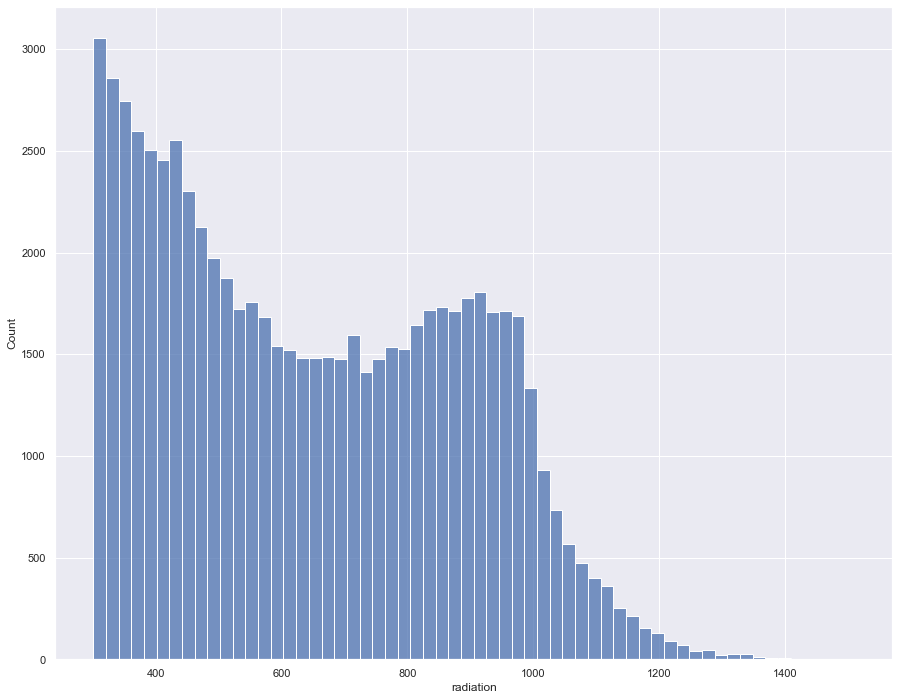

In [41]:
# We first filter 0 values, which otherwise dominate the histogram
radiation_threshold = 300
positive_values = df['radiation'] > radiation_threshold
sns.histplot(data=df['radiation'][positive_values])

# Exercises

1. Go over the Notebooks in the  [Pandas' getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) section.

2. The [data](../../data) directory contains the `life_expectancy` dataset, downloaded from kaggle. The tasks are indicated below.

> The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

In [42]:
DATASET=os.path.join('../../data', 'life_expectancy.csv')
life_ex = pd.read_csv(DATASET)

In [43]:
life_ex

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [44]:
life_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Exercises

* Find the number of countries in the dataset
* Calculate the total number of adult deads `'Adult Mortality'` by country in the period elapsed (sum over all years). Hint: use the `groupby` method.
* Select entries where the level of schooling `'Schooling'` is higher than 13 and status is `Developing`.
* Calculate the average life expectancy per country (average of all years).
    * Order the dataset by life expectancy
* Plot the correlations (`sns.pairplot`) of all or a selected group of variables and see if you can identify positive or netagive correlations.
* Try to plot some values on a map, for instance infant deaths on a given year.
* z-normalize some of the columns (substract the mean and devide by the standard deviation).
* The sky is the limit, do as many tasks on the dataset as you like.


# Further readings

This is just the tip of the iceberg. This notebook is by no means exhaustive. Pandas offers very many other features. We encorage you to visit the documentation and read further online. 